# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [2]:
from statistics import mode

import numpy as np
import pandas as pd
import math
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [98]:
# Pour RNC
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import tensorflow
import keras
# from tensorflow import mnist
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [4]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape
df = pd.read_csv("data.csv",nrows=5000)

In [5]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

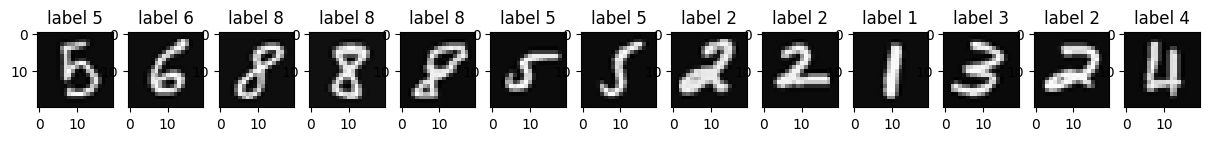

In [6]:
plt.figure(figsize=(15,8))
for i in range(13): #note: each 500 lines, there is a new value
    c = random.randint(X.shape[0]) #pick a random line from the dataset 
    a = X[c,:].reshape((20, 20)) #shape of one number in the image 
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion

In [24]:
def read_from_csv(file_path):
    data = pd.read_csv(file_path,header=None)
    actual_values = data.iloc[:, 0].tolist() # Assumes predicted value is in the first column

    return actual_values

In [25]:
import csv

def confusion_matrix(predicted_values,actual_values):
    matrix = np.zeros((10, 10),dtype=int)
    for i in range (len(actual_values)):
        matrix[actual_values[i]-1][predicted_values[i]-1]+=1
    return matrix

#This is just a test to see a confusion matrix with the precision of 1
T = read_from_csv('labels.csv')
M = confusion_matrix(T,T)
df = pd.DataFrame(M)
print(df)

     0    1    2    3    4    5    6    7    8    9
0  500    0    0    0    0    0    0    0    0    0
1    0  500    0    0    0    0    0    0    0    0
2    0    0  500    0    0    0    0    0    0    0
3    0    0    0  500    0    0    0    0    0    0
4    0    0    0    0  500    0    0    0    0    0
5    0    0    0    0    0  500    0    0    0    0
6    0    0    0    0    0    0  500    0    0    0
7    0    0    0    0    0    0    0  500    0    0
8    0    0    0    0    0    0    0    0  500    0
9    0    0    0    0    0    0    0    0    0  500


In [26]:
def get_parameters(confusion_matrix):
    tp = np.diag(confusion_matrix)
    fp = np.sum(confusion_matrix, axis=0) - tp
    fn = np.sum(confusion_matrix, axis=1) - tp
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return tp,fp,fn,tn
get_parameters(M)

(array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500]))

- Rappel :

In [27]:
def recall(confusion_matrix):
    tp,fp,fn,tn = get_parameters(confusion_matrix)
    return tp/(tp+fn)
recall(M)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

- Précision

In [11]:
def precision(confusion_matrix):
    tp,fp,fn,tn = get_parameters(confusion_matrix)
    return tp/(tp+fn)
precision(M)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

- Taux de FP

In [12]:
def fp_rate(confusion_matrix):
    tp,fp,fn,tn = get_parameters(confusion_matrix)
    return fp/(fp+tn)
fp_rate(M)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

- Spécificité

In [13]:
def specificity(confusion_matrix):
    tp,fp,fn,tn = get_parameters(confusion_matrix)
    return tn/(fp+tn)
specificity(M)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

- Courbe ROC

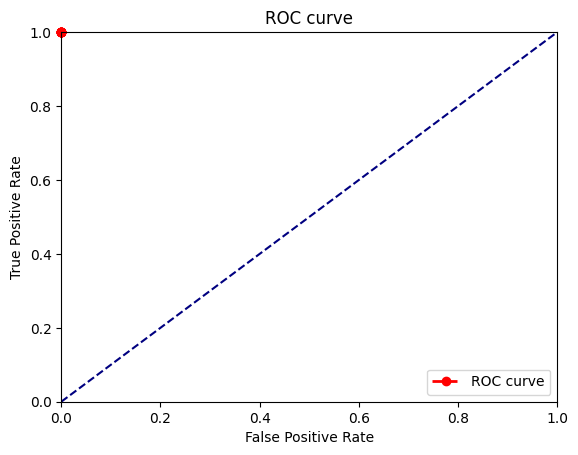

In [82]:
def roc(confusion_matrix):
    fpr = fp_rate(confusion_matrix)
    tpr = recall(confusion_matrix)
    plt.plot(
        fpr,
        tpr,
        linestyle="--",
        marker="o",
        color="red",
        lw=2,
        label="ROC curve",
        clip_on=False,
    )
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend(loc="lower right")
    plt.show()


conf_mat = confusion_matrix([1, 2, 3, 8, 8, 4], [1, 2, 8, 8, 8, 6])
# fallout(conf_mat)
roc(M)

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [18]:

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [20]:
def euclidean(x,y):
    dist = 0
    if len(x) != len(y):
        raise Exception("Incompatible dimensions")
    distance = 0.0
    for i in range(len(x) - 1):
        distance += (x[i] - y[i]) ** 2

    return np.sqrt(distance)


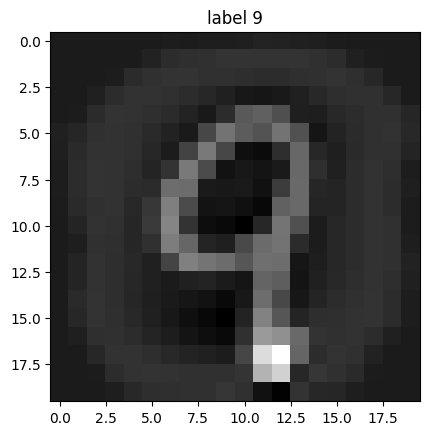

In [21]:
def KPP(x_train, y_train, x, k):
    distances = []
    for i in range(len(x_train)):
        distances.append((y_train[i], euclidean(x, x_train[i])))

    K_neighbors = [
        label for label, distance in sorted(distances, key=lambda x: x[1])[:k]
    ]
    nearest_neighbor = max(set(K_neighbors), key=K_neighbors.count)
    return nearest_neighbor


# tester une image
c = random.randint(Xtt.shape[0])
y_pred = KPP(Xt, Yt, Xtt[c], 5)
a = Xtt[c, :].reshape((20, 20))
a = np.transpose(a)
plt.title("label " + str(y_pred))
plt.imshow(a, cmap="gray")


# Méthode 1: MVS
Machine à Vecteurs de Support

In [46]:
#Créer le modèle
model= svm.SVC(kernel='linear') 
# entrainement 
model.fit(Xt, Yt)
# Prediction
mvs_pred = model.predict(Xtt)
print(len(mvs_pred))

3500


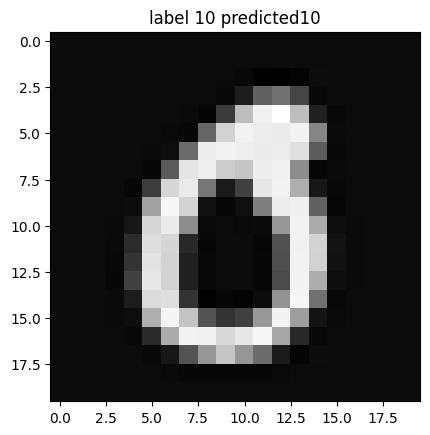

In [48]:
# tester une image
c= 2000
mvs_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c])+ ' predicted' + str(mvs_pred[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


In [52]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
tree_pred = model.predict(Xtt)

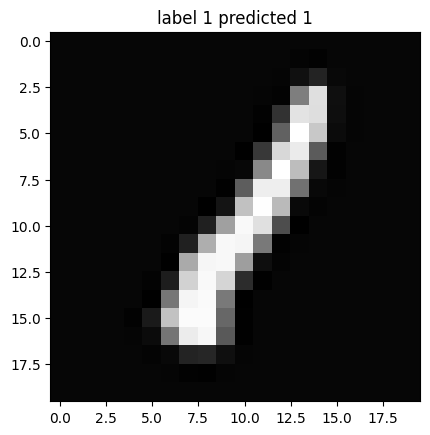

In [53]:
# tester une image
c= 100
tree_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]) +' predicted ' + str(tree_pred[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [67]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [92]:
# Choisir un image de test 
c=1

In [93]:
rn_pred = model.predict(Xtt)

In [94]:
# pour ROC, il faudra les probabilités:
rn_proba_pred = model.predict_proba(Xtt)

Afficher l'image testée

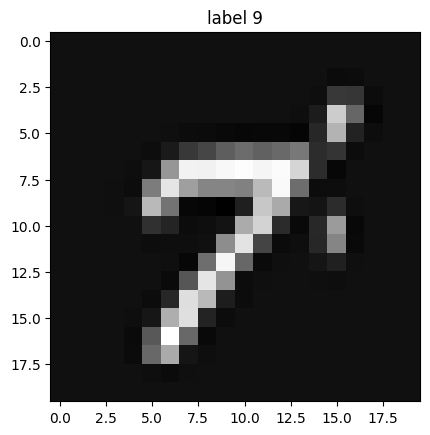

In [95]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(rn_pred[c]))
plt.imshow(a,cmap='gray')

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [104]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [105]:
from keras.optimizers import SGD
from keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
from keras import Sequential
from keras.utils import to_categorical

# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(11, activation='softmax')) # changed number of nodes to 10
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)

# Appliquer les métriques implementées pour voir le résultat

# Méthode 0: K- Plus Proches Voisins

rappel KPP        = [0.97435897 0.90112994 0.8575419  0.92307692 0.86324786 0.92419825
 0.87714286 0.82857143 0.83760684 0.98587571]
precision KPP   = [0.97435897 0.90112994 0.8575419  0.92307692 0.86324786 0.92419825
 0.87714286 0.82857143 0.83760684 0.98587571]
Taux FP KPP     = [0.01206732 0.01684679 0.01145767 0.01265022 0.01746586 0.00475135
 0.01079365 0.01111111 0.01079708 0.00635728]
Specificite KPP = [0.98793268 0.98315321 0.98854233 0.98734978 0.98253414 0.99524865
 0.98920635 0.98888889 0.98920292 0.99364272]


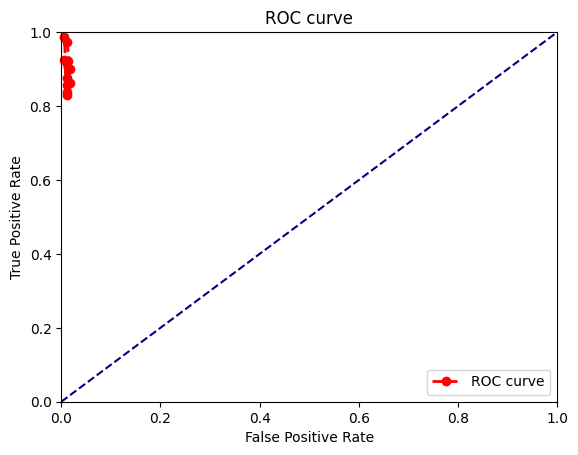

In [80]:
kpp_matrix = confusion_matrix(y_pred, Ytt)
print(f"rappel KPP        = {recall(kpp_matrix)}")
print(f"precision KPP   = {precision(kpp_matrix)}")
print(f"Taux FP KPP     = {fp_rate(kpp_matrix)}")
print(f"Specificite KPP = {specificity(kpp_matrix)}")
roc(kpp_matrix)

# Méthode 1 : MVS

rappel MVS        = [0.97435897 0.90112994 0.8575419  0.92307692 0.86324786 0.92419825
 0.87714286 0.82857143 0.83760684 0.98587571]
precision MVS   = [0.97435897 0.90112994 0.8575419  0.92307692 0.86324786 0.92419825
 0.87714286 0.82857143 0.83760684 0.98587571]
Taux FP MVS     = [0.01206732 0.01684679 0.01145767 0.01265022 0.01746586 0.00475135
 0.01079365 0.01111111 0.01079708 0.00635728]
Specificite MVS = [0.98793268 0.98315321 0.98854233 0.98734978 0.98253414 0.99524865
 0.98920635 0.98888889 0.98920292 0.99364272]


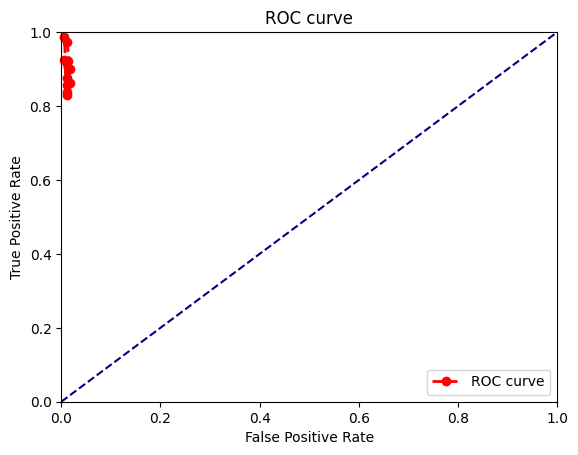

In [49]:
mvs_matrix = confusion_matrix(mvs_pred,Ytt)
print(f"rappel MVS        = {recall(mvs_matrix)}")
print(f"precision MVS   = {precision(mvs_matrix)}")
print(f"Taux FP MVS     = {fp_rate(mvs_matrix)}")
print(f"Specificite MVS = {specificity(mvs_matrix)}")
roc(mvs_matrix)

# Méthode 2 : Arbres de décision

rappel Decision tree        = [0.83190883 0.65254237 0.62011173 0.72189349 0.64387464 0.7638484
 0.82571429 0.6        0.64672365 0.85310734]
precision Decision tree     = [0.83190883 0.65254237 0.62011173 0.72189349 0.64387464 0.7638484
 0.82571429 0.6        0.64672365 0.85310734]
Taux FP Decision tree       = [0.02445221 0.04513668 0.02832591 0.02972802 0.05080978 0.02534051
 0.02825397 0.03809524 0.01968879 0.02606484]
Specificite Decision tree   = [0.97554779 0.95486332 0.97167409 0.97027198 0.94919022 0.97465949
 0.97174603 0.96190476 0.98031121 0.97393516]


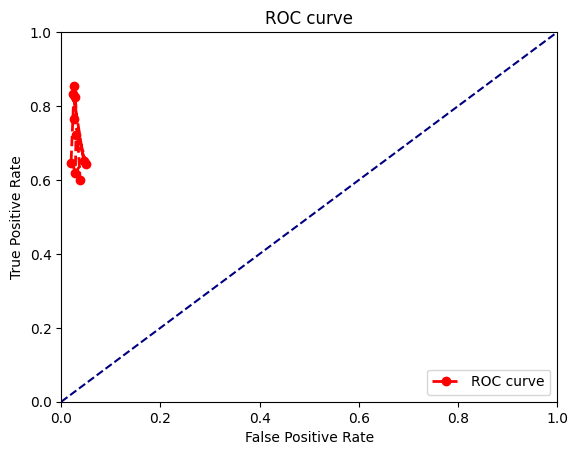

In [78]:
tree_matrix = confusion_matrix(tree_pred,Ytt)
print(f"rappel Decision tree        = {recall(tree_matrix)}")
print(f"precision Decision tree     = {precision(tree_matrix)}")
print(f"Taux FP Decision tree       = {fp_rate(tree_matrix)}")
print(f"Specificite Decision tree   = {specificity(tree_matrix)}")
roc(tree_matrix)

# Méthode 3 : RN

rappel RN        = [0.         0.         0.         0.         0.         0.
 0.00571429 0.         1.         0.        ]
precision RN   = [0.         0.         0.         0.         0.         0.
 0.00571429 0.         1.         0.        ]
Taux FP RN     = [0.         0.         0.         0.         0.         0.
 0.         0.         0.99936488 0.        ]
Specificite RN = [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 6.35122261e-04 1.00000000e+00]


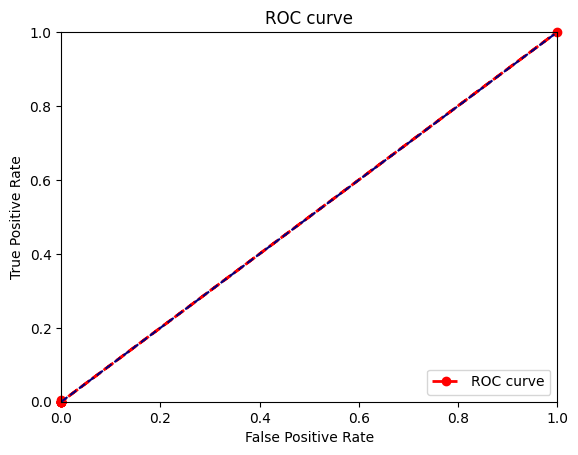

In [106]:
rn_matrix = confusion_matrix(rn_pred,Ytt)
print(f"rappel RN        = {recall(rn_matrix)}")
print(f"precision RN   = {precision(rn_matrix)}")
print(f"Taux FP RN     = {fp_rate(rn_matrix)}")
print(f"Specificite RN = {specificity(rn_matrix)}")
roc(rn_matrix)

# Méthode 4 : RNC

110/110 [==============================] - 1s 8ms/step
rappel RNC = [0.         0.05367232 0.01117318 0.         0.         0.
 0.00285714 0.         0.7008547  0.01412429]
precision RNC = [0.         0.05367232 0.01117318 0.         0.         0.
 0.00285714 0.         0.7008547  0.01412429]
Taux FP RNC = [0.00476342 0.0979021  0.02196053 0.01739405 0.02095903 0.00538486
 0.03079365 0.0047619  0.44871388 0.37190083]
Specificite RNC = [0.99523658 0.9020979  0.97803947 0.98260595 0.97904097 0.99461514
 0.96920635 0.9952381  0.55128612 0.62809917]


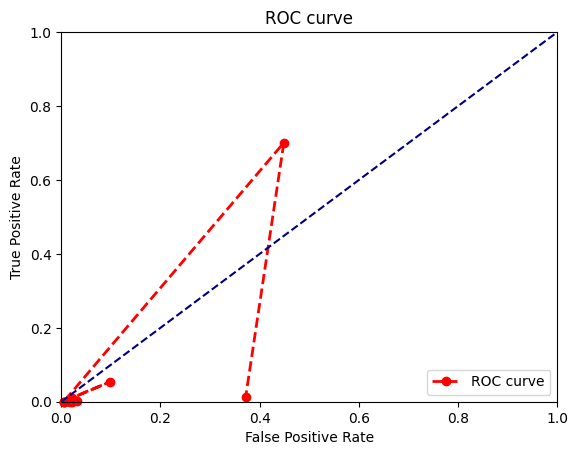

In [110]:
y_pred = model.predict(Xtt_rncN)
Ytt_rnc = to_categorical(Ytt)
rnc_matrix = confusion_matrix(y_pred.argmax(axis=1), Ytt_rnc.argmax(axis=1))

print(f"rappel RNC = {recall(rnc_matrix)}")
print(f"precision RNC = {precision(rnc_matrix)}")
print(f"Taux FP RNC = {fp_rate(rnc_matrix)}")
print(f"Specificite RNC = {specificity(rnc_matrix)}")
roc(rnc_matrix)

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le mardi 14 Mars 2023 à 22h

La partie RNC peut être laissée pour le prochain TP

In [65]:
# bonne chance   TP propose par Dr I.Setitra